# Sentimental Analysis on yelp Reviews

this project aalyzes yelp review sentiment

In [16]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

This performs a quick sentiment analysis based on 1000 yelp reviews.

## Data Loading

we load the yelp labeled review dataset.

each row

Original file can be found here: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [17]:
#importing the file
df = pd.read_csv('yelp_labelled.txt', engine='python', delimiter='\t', header=None)
#display first few rows
df.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [22]:

print(df.columns)

Index([0, 1], dtype='int64')


## Exploratory Data analysis
lets check class distribution to ensure our data is balanced.

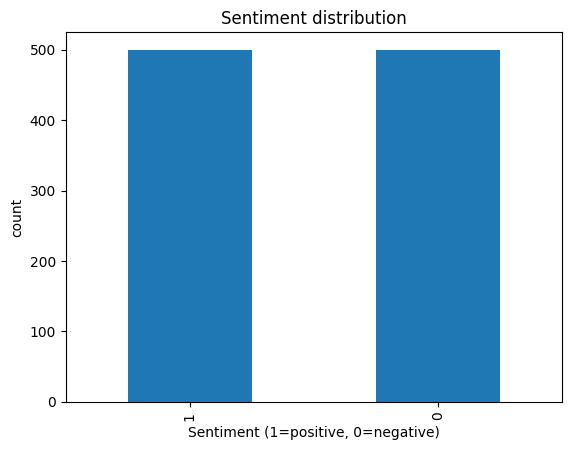

In [23]:
import matplotlib.pyplot as plt
df[1].value_counts().plot(kind='bar')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment (1=positive, 0=negative)')
plt.ylabel('count')
plt.show()


## Feature Engineering
We convert text review into a numeric format using countvectorizer for use in the ML model.

In [30]:

Vectorizer = CountVectorizer()
X =Vectorizer.fit_transform(df['review'])
y= (df['sentiment'])


# Changing column names
0 an 1 to review and sentiment respectively


In [28]:
df.columns=['review','sentiment']

## model training and evaluation
split the data into training and testing sets,train a multinomial naive bayes classifier and evaluate its accuracy.

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model= MultinomialNB()
model.fit(X_train, y_train)
accuracy=model.score(X_test, y_test)
print(f"test accuracy:{accuracy:.2f}")

test accuracy:0.80


## Results and Conclusion
Lets visualize model performance using a confusion matrix and summarize oue findings.

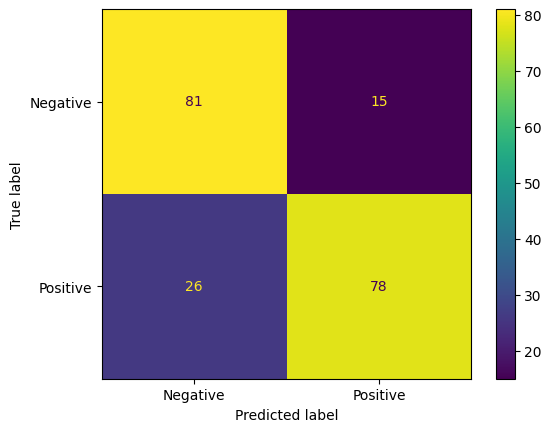

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

### Conclusion

Our Naive Bayes classifier achieves good accuracy on Yelp review sentiment classification. Future improvements could include trying advanced NLP models, data cleaning, or hyperparameter tuning.

---

Feel free to fork this notebook and experiment further!